In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from visualise import visualise_v_quiver

/home/kim/ice_thickness/visualise.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cmap_berlin_tensor = torch.load("configs/vis/cmap_berlin_tensor.pt")


In [2]:
# Import all simulation functions
from simulate import (
    simulate_convergence,
    simulate_branching,
    simulate_merge,
    simulate_deflection,
    simulate_ridge,
)

# Define simulations as a dictionary with names as keys to function objects
simulations = {
    "convergence": simulate_convergence,
    "branching": simulate_branching,
    "merge": simulate_merge,
    "deflection": simulate_deflection,
    "ridge": simulate_ridge,
}

# Plots suitable for dfNN

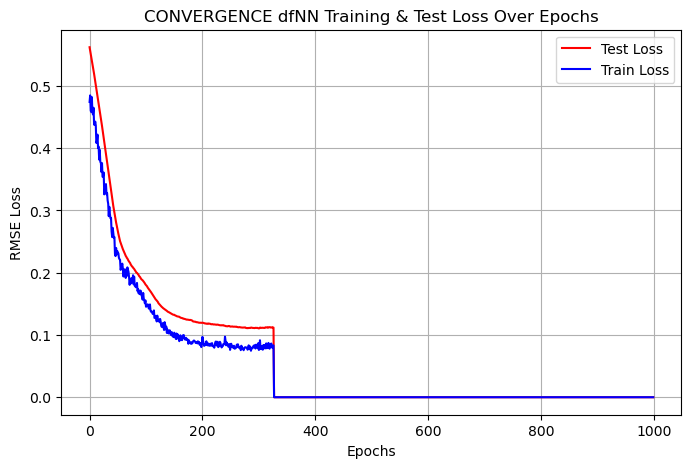

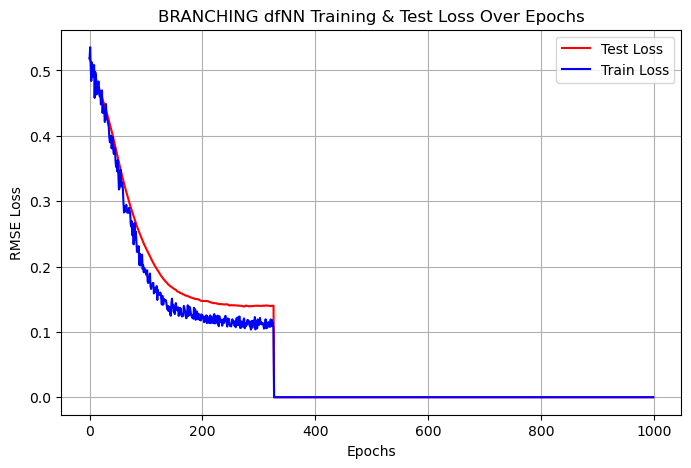

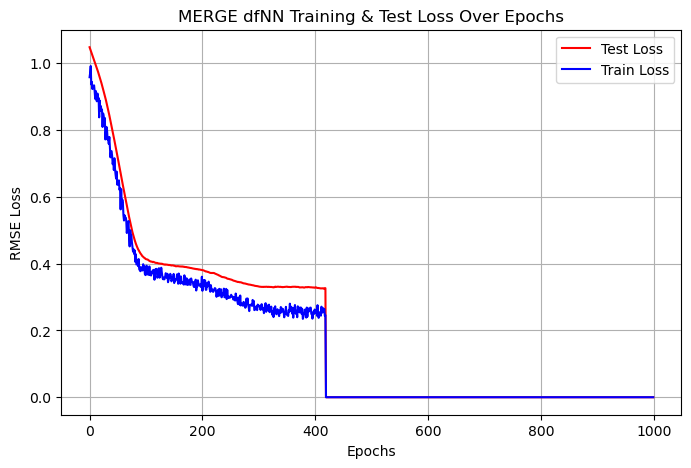

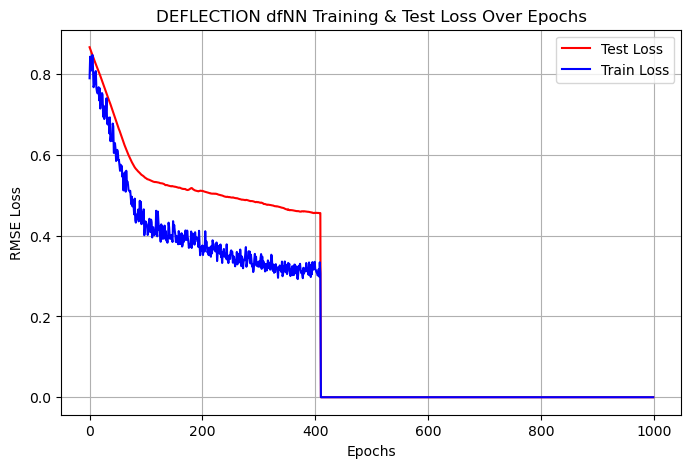

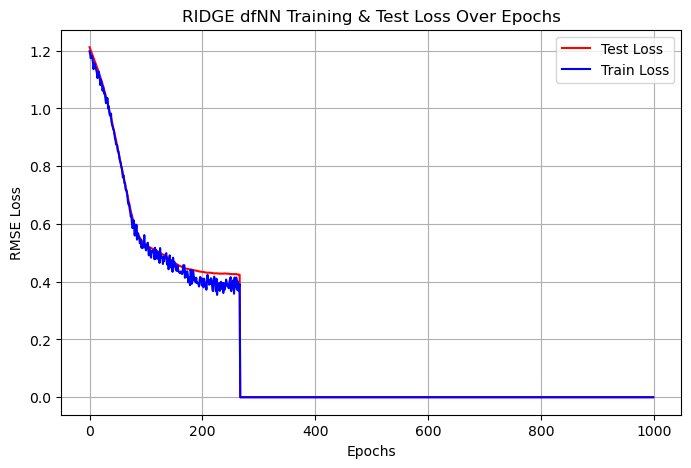

In [5]:
model_name = "dfNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfNN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

/tmp/ipykernel_1234249/2853903056.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pred = torch.load(path) # tensor


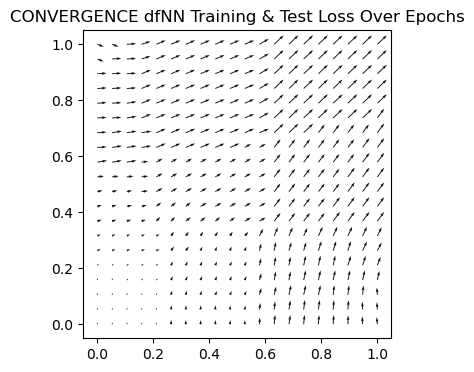

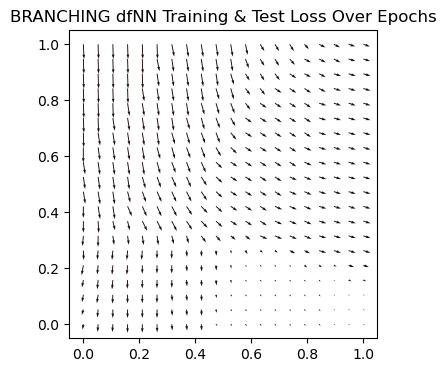

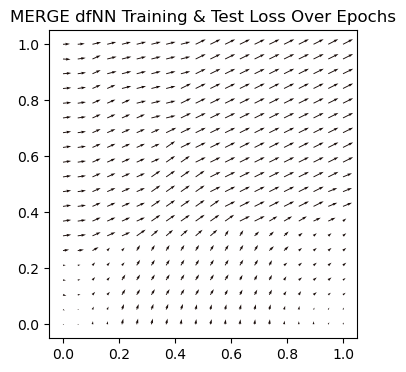

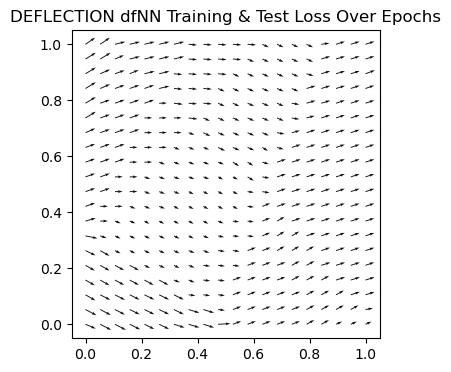

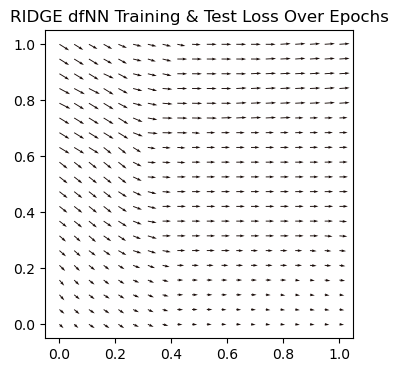

In [7]:
model_name = "dfNN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfNN_test_predictions.pt"
    pred = torch.load(path) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# PINN

- plot both loss components

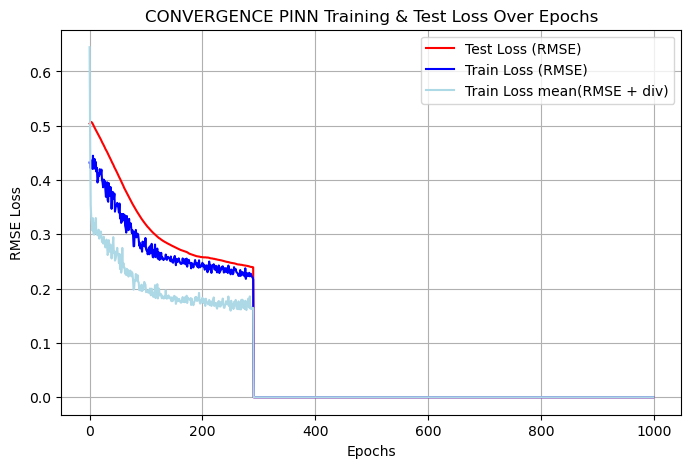

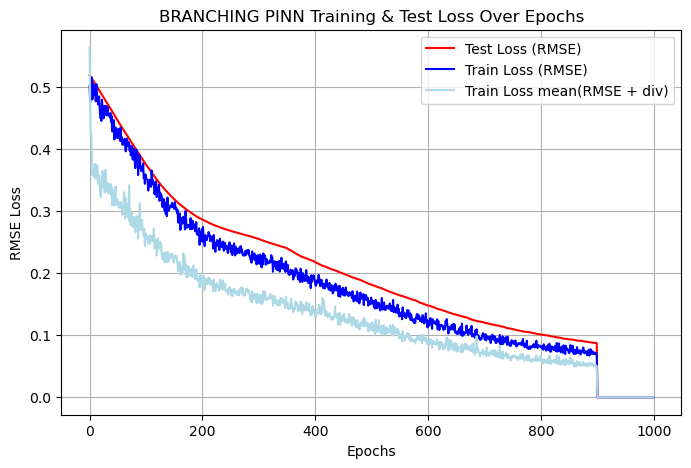

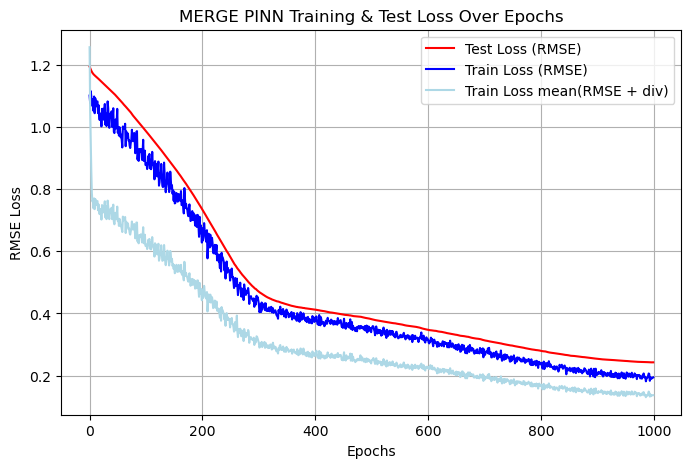

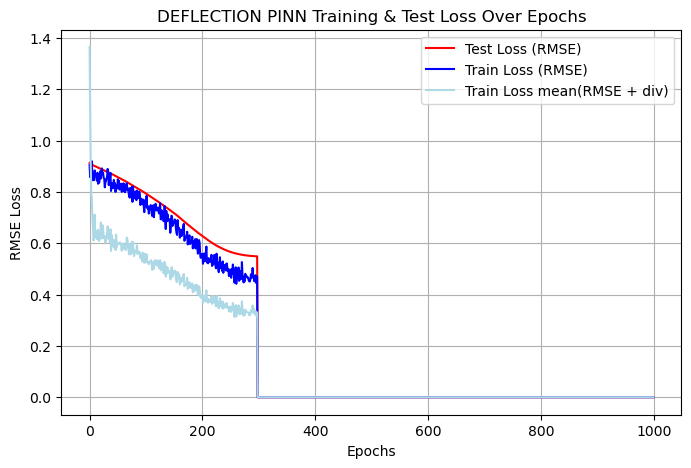

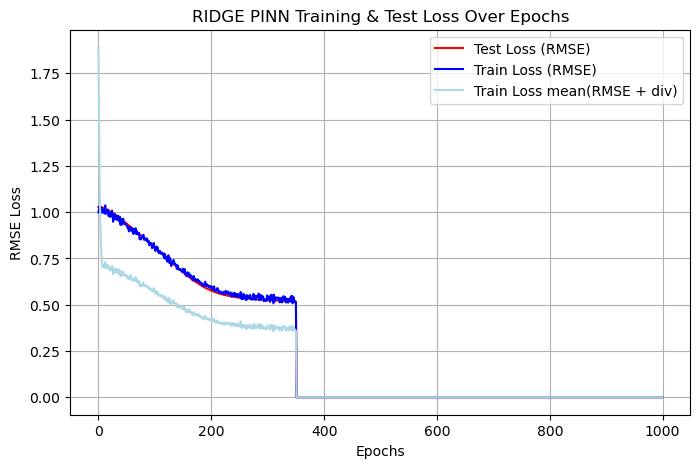

In [20]:
model_name = "PINN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_PINN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss (RMSE)", color = "red")
    # Scale it?
    # plt.plot(losses["Epoch"], losses["Test Loss"] * 0.3, label = "Test Loss", color = "pink")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss (RMSE)", color = "blue")
    plt.plot(losses["Epoch"], losses["Train Loss"], label = "Train Loss mean(RMSE + div)", color = "lightblue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

# dfGP

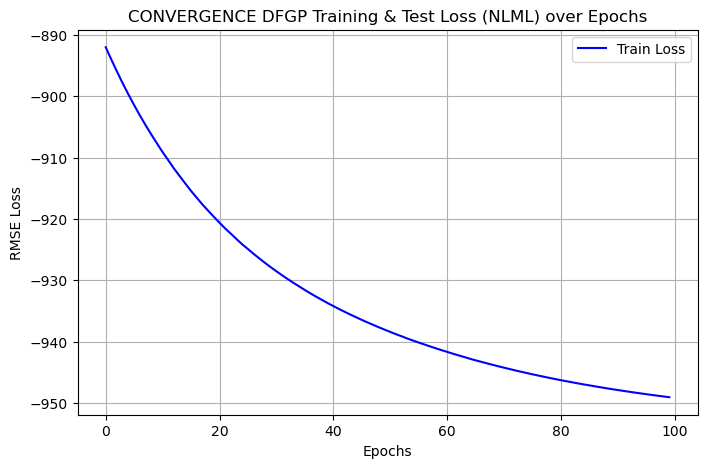

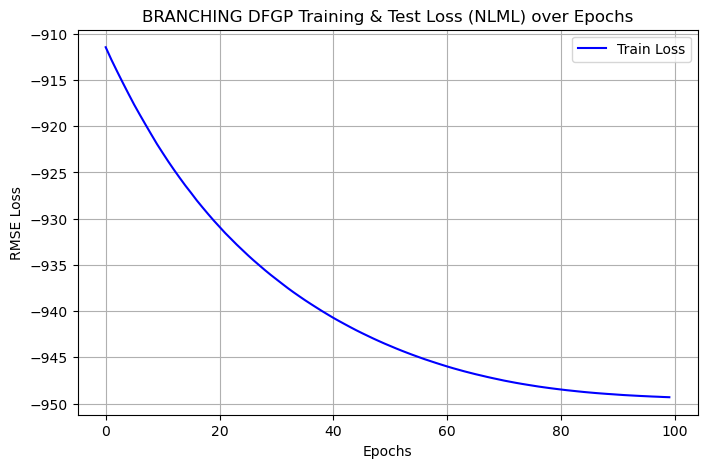

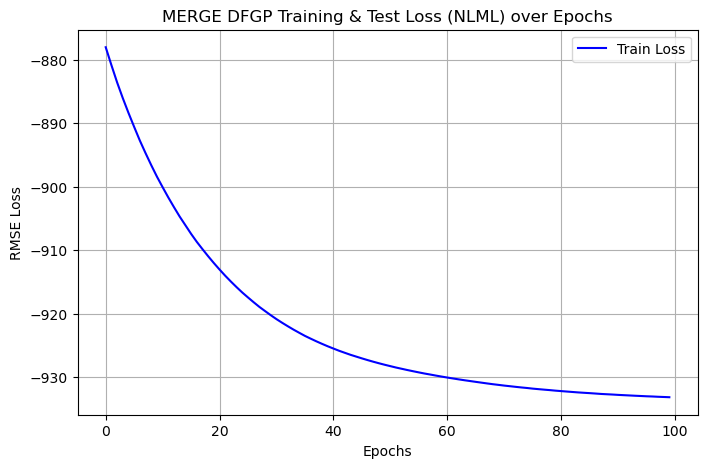

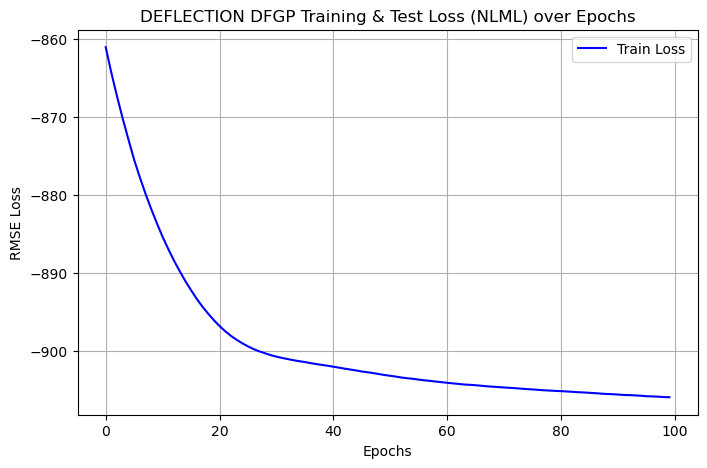

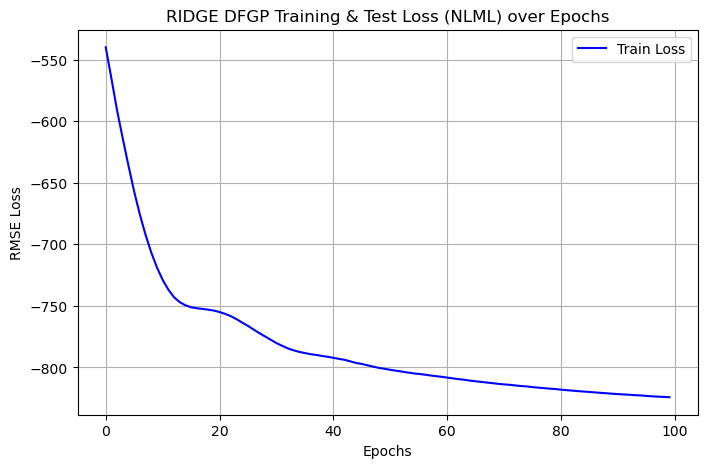

In [30]:
model_name = "DFGP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    # plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

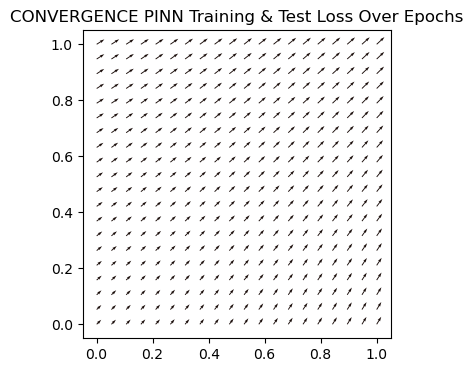

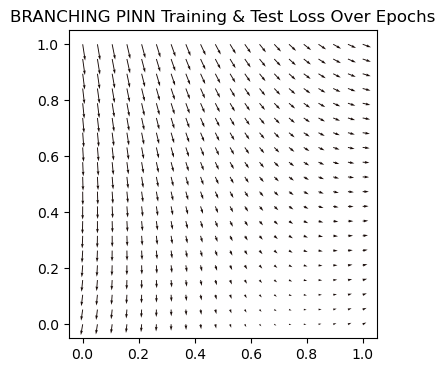

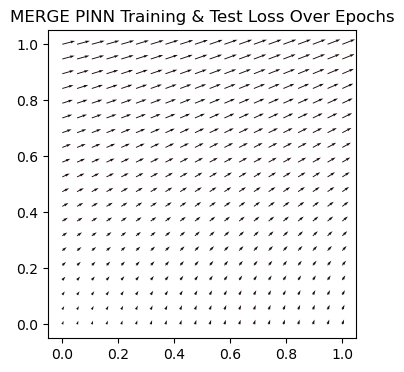

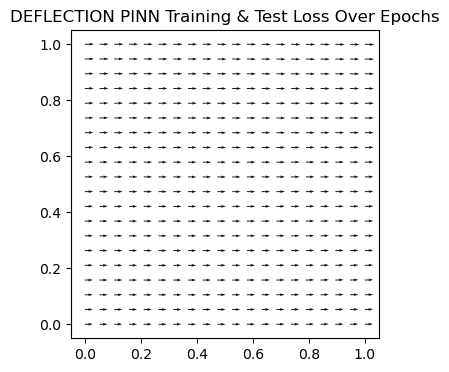

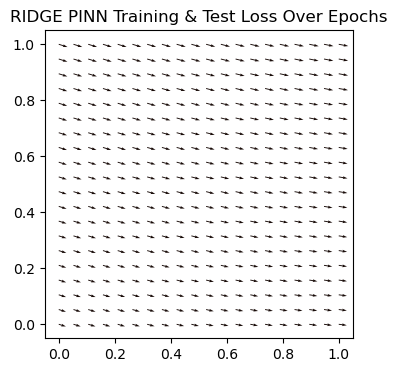

In [21]:
model_name = "PINN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_PINN_test_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# dfGP

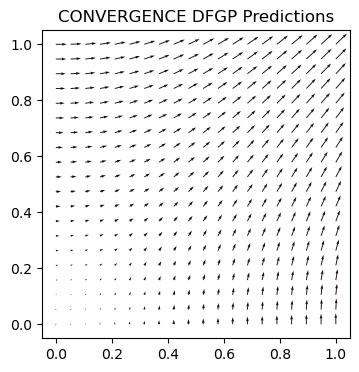

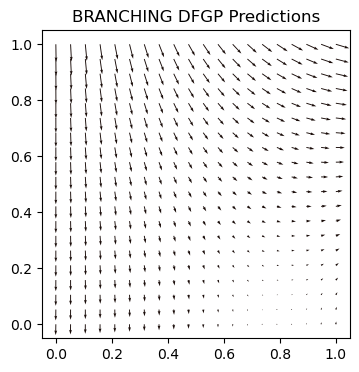

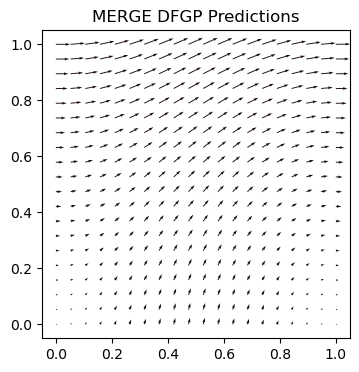

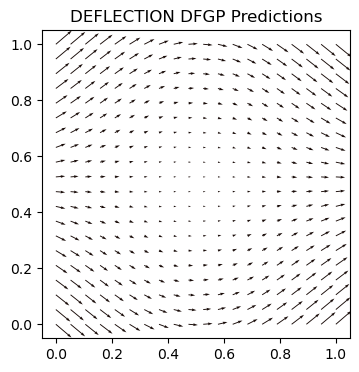

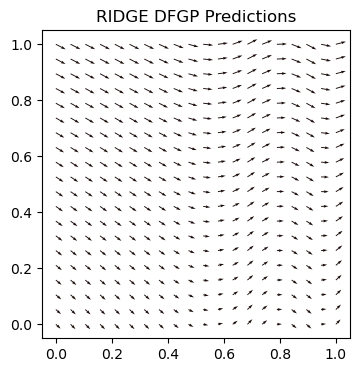

In [26]:
model_name = "DFGP"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfGP_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)